In [1]:
import pandas as pd
import re

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Read csv file
df_lotte = pd.read_csv('/content/drive/My Drive/crawl/lotte_insta.csv')
df_megabox = pd.read_csv('/content/drive/My Drive/crawl/megabox_insta.csv')
df_cgv = pd.read_csv('/content/drive/My Drive/crawl/cgv_processed.csv')

In [5]:
df_combined = pd.concat([df_lotte, df_megabox, df_cgv])
df_combined = df_combined.sort_values(by='post_date')
df_combined = df_combined.reset_index(drop=True)
df_combined

,account,post_num,post_date,text,num_likes,real_tags
0,megaboxon,1753,2014-07-01,megaboxon\n당신의 꿈을 개봉합니다. #메가박스\n525주,56,['#메가박스']
1,megaboxon,1751,2014-07-01,megaboxon\n이 야밤에 간절히 생각나는 너\n\n#메가박스 #S포테이토 #M...,58,"['#메가박스', '#S포테이토', '#MEGABOX', '#SPotato', '#..."
2,megaboxon,1752,2014-07-01,megaboxon\n오늘같이 선선한 저녁엔 붕붕이를 끌고 자동차극장에 가서 영화 한...,32,"['#메가박스', '#드라이브M', '#용인', '#자동차극장', '#MEGABOX..."
3,megaboxon,1748,2014-07-02,megaboxon\n장마가 시작되었나봐요. 비가 올 땐 영화관 데이트가 딱인데👫💑👪...,50,"['#데이트할여친이없네', '#집엔어떻게가지', '#저녁은뭐먹지', '#메가박스',..."
4,megaboxon,1749,2014-07-02,megaboxon\n#메가박스 #MEGABOX #cinema #design #col...,34,"['#메가박스', '#MEGABOX', '#cinema', '#design', '#..."
...,...,...,...,...,...,...
6157,megaboxon,2,2024-07-22,megaboxon\n카카오뱅크 저금통 with 메가박스💰\n⠀⠀⠀⠀⠀⠀⠀⠀\n지금 ...,194,"['#카카오뱅크', '#메가박스', '#MEETPLAYSHARE']"
6158,megaboxon,3,2024-07-22,"megaboxon\n슈트-업 한 악당 처리반 어떻게 참는데···🍌\n피규어, 빔 키...",463,"['#슈퍼배드4', '#슈퍼배드4', '#메가박스', '#MEETPLAYSHARE']"
6159,lottecinema_official,4,2024-07-22,lottecinema_official\n동성로 리클라이너🌟 누가 가장 편했나요?\n...,200,"['#동성로리클라이너', '#롯데시네마리클라이너', '#롯데시네마동성로', '#이벤..."
6160,megaboxon,1,2024-07-23,megaboxon\n💛SUIT-UP💙\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n📍 한 예매...,950,"['#영화를_가장_잘_간직하는_방법', '#슈퍼배드4', '#오리지널티켓', '#메..."


In [6]:
# Function to convert likes
def convert_likes(likes):
    likes_str = str(likes)  # Ensure likes is a string
    if '만' in likes_str:
        number = likes_str.replace('만', '')  # Remove '만'
        new_likes = int(float(number) * 10000)  # Convert to integer
    else:
        new_likes = int(likes_str)  # Convert directly to integer
    return new_likes

# Apply the function to the 'num_likes' column
df_combined['num_likes'] = df_combined['num_likes'].apply(convert_likes)

## 파생변수 생성

In [7]:
## 파생변수 (날짜)
df_combined['post_date'] = pd.to_datetime(df_combined['post_date'])
df_combined['year'] = df_combined['post_date'].dt.year
df_combined['month'] = df_combined['post_date'].dt.month
df_combined['year_month'] = df_combined['post_date'].dt.to_period('M')

In [8]:
## 파생변수 (태그 수)
df_combined['num_tags']=0
for i, hashtags_string in enumerate(df_combined['real_tags']):
  hashtags_list = re.findall(r"#\w+", hashtags_string)
  df_combined['real_tags'][i] = hashtags_list
  df_combined['num_tags'][i] = len(hashtags_list)

<ipython-input-8-d2453e7d0141>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['real_tags'][i] = hashtags_list
<ipython-input-8-d2453e7d0141>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['num_tags'][i] = len(hashtags_list)


In [9]:
df_combined

,account,post_num,post_date,text,num_likes,real_tags,year,month,year_month,num_tags
0,megaboxon,1753,2014-07-01,megaboxon\n당신의 꿈을 개봉합니다. #메가박스\n525주,56,[#메가박스],2014,7,2014-07,1
1,megaboxon,1751,2014-07-01,megaboxon\n이 야밤에 간절히 생각나는 너\n\n#메가박스 #S포테이토 #M...,58,"[#메가박스, #S포테이토, #MEGABOX, #SPotato, #frenchfri...",2014,7,2014-07,6
2,megaboxon,1752,2014-07-01,megaboxon\n오늘같이 선선한 저녁엔 붕붕이를 끌고 자동차극장에 가서 영화 한...,32,"[#메가박스, #드라이브M, #용인, #자동차극장, #MEGABOX, #DriveM...",2014,7,2014-07,7
3,megaboxon,1748,2014-07-02,megaboxon\n장마가 시작되었나봐요. 비가 올 땐 영화관 데이트가 딱인데👫💑👪...,50,"[#데이트할여친이없네, #집엔어떻게가지, #저녁은뭐먹지, #메가박스, #megabo...",2014,7,2014-07,7
4,megaboxon,1749,2014-07-02,megaboxon\n#메가박스 #MEGABOX #cinema #design #col...,34,"[#메가박스, #MEGABOX, #cinema, #design, #color, #p...",2014,7,2014-07,9
...,...,...,...,...,...,...,...,...,...,...
6157,megaboxon,2,2024-07-22,megaboxon\n카카오뱅크 저금통 with 메가박스💰\n⠀⠀⠀⠀⠀⠀⠀⠀\n지금 ...,194,"[#카카오뱅크, #메가박스, #MEETPLAYSHARE]",2024,7,2024-07,3
6158,megaboxon,3,2024-07-22,"megaboxon\n슈트-업 한 악당 처리반 어떻게 참는데···🍌\n피규어, 빔 키...",463,"[#슈퍼배드4, #슈퍼배드4, #메가박스, #MEETPLAYSHARE]",2024,7,2024-07,4
6159,lottecinema_official,4,2024-07-22,lottecinema_official\n동성로 리클라이너🌟 누가 가장 편했나요?\n...,200,"[#동성로리클라이너, #롯데시네마리클라이너, #롯데시네마동성로, #이벤트, #동성로...",2024,7,2024-07,8
6160,megaboxon,1,2024-07-23,megaboxon\n💛SUIT-UP💙\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n📍 한 예매...,950,"[#영화를_가장_잘_간직하는_방법, #슈퍼배드4, #오리지널티켓, #메가박스, #M...",2024,7,2024-07,5


## 시각화

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# Group by 'year_month' and calculate the total number of likes
date_likes = df_combined.groupby('year_month')['num_likes'].sum().reset_index()
date_likes.rename(columns={'num_likes': 'tot_num_likes'}, inplace=True)

# Calculate the number of posts per 'year_month'
num_posts_per_month = df_combined.groupby('year_month').size().reset_index(name='num_posts')

# Merge the number of posts into the date_likes DataFrame
date_likes = pd.merge(date_likes, num_posts_per_month, on='year_month', how='left')

# Display the resulting DataFrame
date_likes = date_likes[:-1]
date_likes['avg_likes'] = date_likes['tot_num_likes']/date_likes['num_posts']

date_likes

,year_month,tot_num_likes,num_posts,avg_likes
0,2014-07,1003,20,50.150000
1,2014-08,262,4,65.500000
2,2015-07,268,1,268.000000
3,2015-08,434,2,217.000000
4,2015-09,351,2,175.500000
...,...,...,...,...
102,2024-02,211651,144,1469.798611
103,2024-03,3097961,157,19732.235669
104,2024-04,293179,143,2050.202797
105,2024-05,301809,161,1874.590062


<ipython-input-48-455526716b7c>:4: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(date_likes['year_month']):


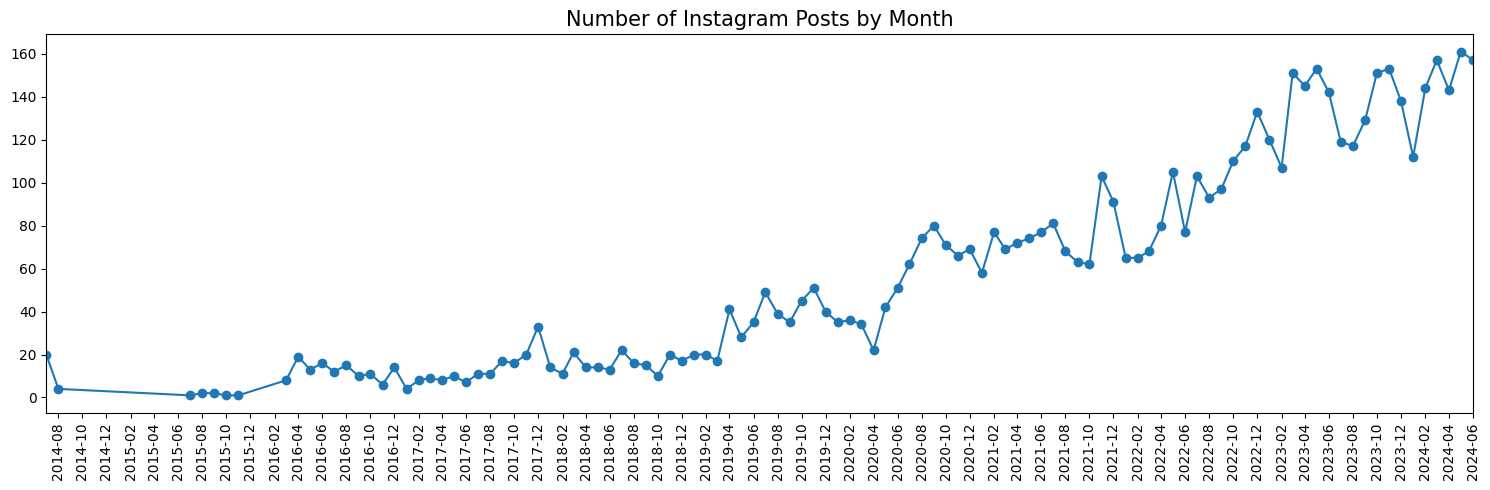

In [48]:
import matplotlib.dates as mdates

# Convert 'year_month' to datetime if it's in Period format
if pd.api.types.is_period_dtype(date_likes['year_month']):
    date_likes['year_month'] = date_likes['year_month'].dt.to_timestamp()

# Create a figure and axis
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot()

# Prepare the x-axis dates for plotting
axis_date = [dt.strftime('%Y-%m') for dt in date_likes['year_month']]

# Plot the number of posts by month
ax.plot(date_likes['year_month'], date_likes['num_posts'], marker='o')

# Set the title
plt.title('Number of Instagram Posts by Month', fontsize=15)

# Set x-axis major locator and formatter to show every 2 months
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Set interval to 2 months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format the date labels

# Rotate and format x-axis labels
plt.xticks(rotation=90)
plt.margins(x=0)
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-49-4e0dd2a011a1>:4: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(date_likes['year_month']):


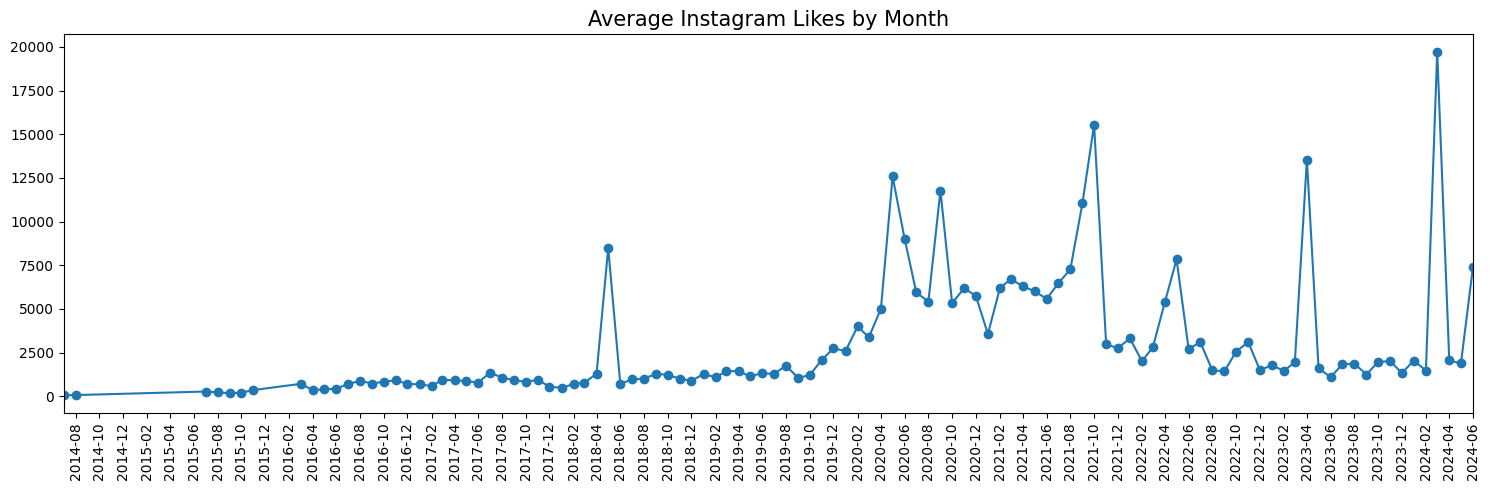

In [49]:
# Convert 'year_month' to datetime if it's in Period format
if pd.api.types.is_period_dtype(date_likes['year_month']):
    date_likes['year_month'] = date_likes['year_month'].dt.to_timestamp()

# Create a figure and axis
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot()

if isinstance(date_likes['year_month'].dtype, pd.PeriodDtype):
    date_likes['year_month'] = date_likes['year_month'].dt.to_timestamp()

# Plot the number of posts by month
ax.plot(date_likes['year_month'], date_likes['avg_likes'], marker='o')

# Set the title
plt.title('Average Instagram Likes by Month', fontsize=15)

# Set x-axis major locator and formatter to show every 2 months
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Set interval to 2 months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format the date labels

# Rotate and format x-axis labels
plt.xticks(rotation=90)
plt.margins(x=0)
plt.tight_layout()

# Show the plot
plt.show()


In [50]:
# Group by 'year_month' and calculate the total number of likes
year_likes = df_combined.groupby('year')['num_likes'].sum().reset_index()
year_likes.rename(columns={'num_likes': 'tot_num_likes'}, inplace=True)

# Calculate the number of posts per 'year_month'
num_posts_per_month = df_combined.groupby('year').size().reset_index(name='num_posts')

# Merge the number of posts into the date_likes DataFrame
year_likes = pd.merge(year_likes, num_posts_per_month, on='year', how='left')
year_likes['avg_likes'] = year_likes['tot_num_likes']/year_likes['num_posts']

# Display the resulting DataFrame
year_likes

,year,tot_num_likes,num_posts,avg_likes
0,2014,1265,24,52.708333
1,2015,1609,7,229.857143
2,2016,77519,124,625.153226
3,2017,129438,154,840.506494
4,2018,280530,187,1500.160428
5,2019,645741,420,1537.478571
6,2020,4339924,642,6760.006231
7,2021,5706430,895,6375.899441
8,2022,3436370,1113,3087.484277
9,2023,4407947,1625,2712.582769


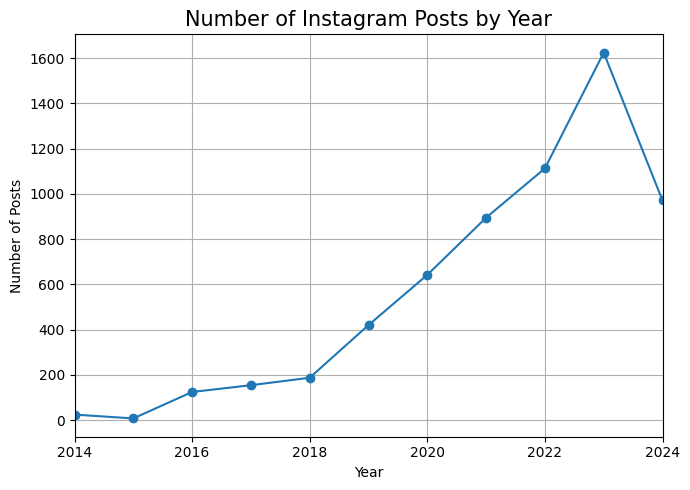

In [51]:
# Create a figure and axis
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot()  # Create the subplot

# Plot the number of posts by month
plt.plot(year_likes['year'], year_likes['num_posts'], marker='o')

# Set the title
plt.title('Number of Instagram Posts by Year', fontsize=15)
plt.xlabel('Year')
plt.ylabel('Number of Posts')

# Rotate and format x-axis labels
plt.margins(x=0)
plt.tight_layout()

ax.grid(True)
# Show the plot
plt.show()

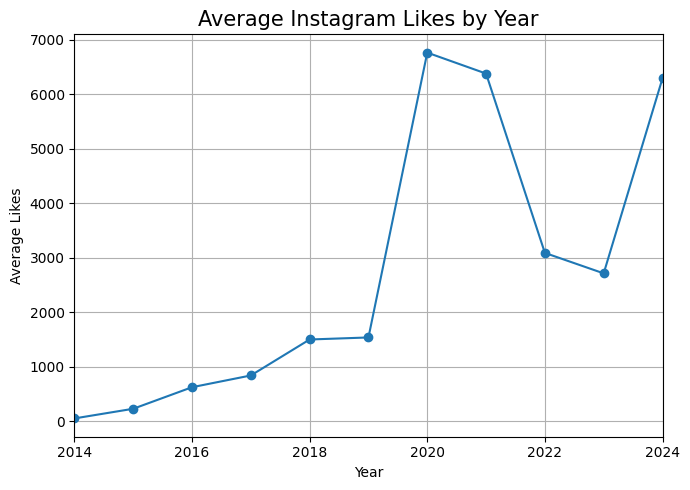

In [52]:
# Create a figure and axis
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot()  # Add an axis to the figure

# Plot the number of posts by month
plt.plot(year_likes['year'], year_likes['avg_likes'], marker='o')

# Set the title
plt.title('Average Instagram Likes by Year', fontsize=15)
plt.xlabel('Year')
plt.ylabel('Average Likes')

# Rotate and format x-axis labels
plt.margins(x=0)
plt.tight_layout()


ax.grid(True)
# Show the plot
plt.show()

## 해시태그 분석

In [11]:
from scipy import stats
from collections import Counter

In [14]:
pip install plotly==5.15.0

In [15]:
import plotly.express as px

In [71]:
df_megabox = df_combined[df_combined['account']=='megaboxon']
df_cgv = df_combined[df_combined['account']=='cgv_korea']
df_lotte = df_combined[df_combined['account']=='lottecinema_official']

In [82]:
## cgv
all_tags = [tag for sublist in df_cgv['real_tags'] for tag in sublist] # 각 태그 리스트를 하나의 큰 리스트로 변환
tag_counts = Counter(all_tags) # 태그 빈도 계산
tag_counts_cgv = pd.DataFrame(tag_counts.items(), columns=['Tag', 'Frequency']) # 빈도 데이터를 데이터프레임으로 변환
tag_counts_cgv = tag_counts_cgv.sort_values(by='Frequency', ascending=False) # 빈도 기준으로 정렬
top_tags_cgv = tag_counts_cgv[1:11]
fig = px.bar(top_tags_cgv , x='Frequency', y='Tag', title='Top 10 Hashtags by Frequency @cgv_korea', text='Frequency')
fig.update_layout(yaxis=dict(tickmode='array', tickvals=top_tags_cgv['Tag'], ticktext=top_tags_cgv['Tag']))
fig.update_layout(title={'x': 0.6, 'xanchor': 'center'}, width=800, height=700, yaxis=dict(tickfont=dict(size=17)))
fig.show()

In [83]:
# Initialize dictionaries to store sum and count of likes
tag_likes_sum = {}
tag_likes_count = Counter()

# Iterate over each row in the DataFrame
for idx, row in df_cgv.iterrows():
    if row['real_tags']:
        # Only process the first tag in each post
        first_tag = row['real_tags'][0]
        if first_tag in tag_likes_sum:
            tag_likes_sum[first_tag] += row['num_likes']
        else:
            tag_likes_sum[first_tag] = row['num_likes']
        tag_likes_count[first_tag] += 1

# Calculate average likes per tag
tag_likes_avg = {tag: tag_likes_sum[tag] / tag_likes_count[tag] for tag in tag_likes_sum}

# Create a DataFrame for the results
tag_likes_cgv = pd.DataFrame(list(tag_likes_avg.items()), columns=['Tag', 'Likes'])

# Sort the DataFrame by Likes in descending order
tag_likes_cgv = tag_likes_cgv.sort_values(by='Likes', ascending=False)

# Convert Likes to integer
tag_likes_cgv['Likes'] = tag_likes_cgv['Likes'].astype(int)

# Plotly를 사용하여 바 차트 생성
top_likes_cgv = tag_likes_cgv[1:11]
fig = px.bar(top_likes_cgv , x='Likes', y='Tag', title='Top 10 Hashtags by Average Likes @cgv_korea', text='Likes')
fig.update_layout(yaxis=dict(tickmode='array', tickvals=top_likes_cgv['Tag'], ticktext=top_likes_cgv['Tag']))
fig.update_layout(title={'x': 0.6, 'xanchor': 'center'}, width=800, height=700, yaxis=dict(tickfont=dict(size=17)))
fig.update_traces(marker_color='#FF1493')
fig.show()

In [84]:
## megabox
all_tags = [tag for sublist in df_megabox['real_tags'] for tag in sublist] # 각 태그 리스트를 하나의 큰 리스트로 변환
tag_counts = Counter(all_tags) # 태그 빈도 계산
tag_counts_megabox = pd.DataFrame(tag_counts.items(), columns=['Tag', 'Frequency']) # 빈도 데이터를 데이터프레임으로 변환
tag_counts_megabox = tag_counts_megabox.sort_values(by='Frequency', ascending=False) # 빈도 기준으로 정렬

top_tags_megabox = tag_counts_megabox[1:11]

fig = px.bar(top_tags_megabox , x='Frequency', y='Tag', title='Top 10 Hashtags by Frequency @megaboxon', text='Frequency')
fig.update_layout(yaxis=dict(tickmode='array', tickvals=top_tags_megabox['Tag'], ticktext=top_tags_megabox['Tag']))
fig.update_layout(title={'x': 0.6, 'xanchor': 'center'}, width=800, height=700, yaxis=dict(tickfont=dict(size=17)))
fig.show()

In [87]:
# Initialize dictionaries to store sum and count of likes
tag_likes_sum = {}
tag_likes_count = Counter()

# Iterate over each row in the DataFrame
for idx, row in df_megabox.iterrows():
    if row['real_tags']:
        # Only process the first tag in each post
        first_tag = row['real_tags'][0]
        if first_tag in tag_likes_sum:
            tag_likes_sum[first_tag] += row['num_likes']
        else:
            tag_likes_sum[first_tag] = row['num_likes']
        tag_likes_count[first_tag] += 1

# Calculate average likes per tag
tag_likes_avg = {tag: tag_likes_sum[tag] / tag_likes_count[tag] for tag in tag_likes_sum}

# Create a DataFrame for the results
tag_likes_megabox = pd.DataFrame(list(tag_likes_avg.items()), columns=['Tag', 'Likes'])

# Sort the DataFrame by Likes in descending order
tag_likes_megabox = tag_likes_megabox.sort_values(by='Likes', ascending=False)

# Convert Likes to integer
tag_likes_megabox['Likes'] = tag_likes_megabox['Likes'].astype(int)

# Plotly를 사용하여 바 차트 생성
tag_likes_megabox = tag_likes_megabox[0:10]
fig = px.bar(tag_likes_megabox , x='Likes', y='Tag', title='Top 10 Hashtags by Average Likes @megaboxon', text='Likes')
fig.update_layout(yaxis=dict(tickmode='array', tickvals=tag_likes_megabox['Tag'], ticktext=tag_likes_megabox['Tag']))
fig.update_layout(title={'x': 0.6, 'xanchor': 'center'}, width=800, height=700, yaxis=dict(tickfont=dict(size=17)))
fig.update_traces(marker_color='#FF1493')
fig.show()

In [78]:
## lotte
all_tags = [tag for sublist in df_lotte['real_tags'] for tag in sublist] # 각 태그 리스트를 하나의 큰 리스트로 변환
tag_counts = Counter(all_tags) # 태그 빈도 계산
tag_counts_lotte = pd.DataFrame(tag_counts.items(), columns=['Tag', 'Frequency']) # 빈도 데이터를 데이터프레임으로 변환
tag_counts_lotte = tag_counts_lotte.sort_values(by='Frequency', ascending=False) # 빈도 기준으로 정렬

top_tags_lotte = tag_counts_lotte[2:12]
fig = px.bar(top_tags_lotte , x='Frequency', y='Tag', title='Top 10 Hashtags by Frequency @lottecinema_official', text='Frequency')
fig.update_layout(yaxis=dict(tickmode='array', tickvals=top_tags_lotte['Tag'], ticktext=top_tags_lotte['Tag']))
fig.update_layout(title={'x': 0.6, 'xanchor': 'center'}, width=800, height=700, yaxis=dict(tickfont=dict(size=17)))
fig.show()

In [88]:
# Initialize dictionaries to store sum and count of likes
tag_likes_sum = {}
tag_likes_count = Counter()

# Iterate over each row in the DataFrame
for idx, row in df_lotte.iterrows():
    if row['real_tags']:
        # Only process the first tag in each post
        first_tag = row['real_tags'][0]
        if first_tag in tag_likes_sum:
            tag_likes_sum[first_tag] += row['num_likes']
        else:
            tag_likes_sum[first_tag] = row['num_likes']
        tag_likes_count[first_tag] += 1

# Calculate average likes per tag
tag_likes_avg = {tag: tag_likes_sum[tag] / tag_likes_count[tag] for tag in tag_likes_sum}

# Create a DataFrame for the results
tag_likes_lotte = pd.DataFrame(list(tag_likes_avg.items()), columns=['Tag', 'Likes'])

# Sort the DataFrame by Likes in descending order
tag_likes_lotte = tag_likes_lotte.sort_values(by='Likes', ascending=False)

# Convert Likes to integer
tag_likes_lotte['Likes'] = tag_likes_lotte['Likes'].astype(int)

# Plotly를 사용하여 바 차트 생성
top_likes_lotte = tag_likes_lotte.head(10)
fig = px.bar(top_likes_lotte , x='Likes', y='Tag', title='Top 10 Hashtags by Likes @lottecinema_official', text='Likes')
fig.update_layout(yaxis=dict(tickmode='array', tickvals=top_likes_lotte['Tag'], ticktext=top_likes_lotte['Tag']))
fig.update_layout(title={'x': 0.6, 'xanchor': 'center'}, width=800, height=700, yaxis=dict(tickfont=dict(size=17)))
fig.update_traces(marker_color='#FF1493')
fig.show()

## 컨텐츠 비교 (시각화)

In [16]:
# 영화 제목 가져오기
df_2016 = pd.read_excel('/content/drive/My Drive/crawl/box_office.xlsx', sheet_name = '2016년')
df_2017 = pd.read_excel('/content/drive/My Drive/crawl/box_office.xlsx', sheet_name = '2017년')
df_2018 = pd.read_excel('/content/drive/My Drive/crawl/box_office.xlsx', sheet_name = '2018년')
df_2019 = pd.read_excel('/content/drive/My Drive/crawl/box_office.xlsx', sheet_name = '2019년')
df_2020 = pd.read_excel('/content/drive/My Drive/crawl/box_office.xlsx', sheet_name = '2020년')
df_2021 = pd.read_excel('/content/drive/My Drive/crawl/box_office.xlsx', sheet_name = '2021년')
df_2022 = pd.read_excel('/content/drive/My Drive/crawl/box_office.xlsx', sheet_name = '2022년')
df_2023 = pd.read_excel('/content/drive/My Drive/crawl/box_office.xlsx', sheet_name = '2023년')
df_2024 = pd.read_excel('/content/drive/My Drive/crawl/box_office.xlsx', sheet_name = '2024년')
df_july = pd.read_excel('/content/drive/My Drive/crawl/movie_list_july.xlsx', sheet_name='시트1')
df_movies = pd.concat([df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023, df_2024])

In [17]:
movie_titles = [str(title).replace(' ', '') for title in df_movies['영화명']]
movie_titles_july = [str(title).replace(' ', '') for title in df_july.iloc[:,0]]
movie_titles = movie_titles + movie_titles_july

In [18]:
print(movie_titles)

['부산행', '검사외전', '캡틴아메리카:시빌워', '밀정', '터널', '인천상륙작전', '럭키', '곡성', '덕혜옹주', '닥터스트레인지', '마스터', '주토피아', '신비한동물사전', '판도라', '아가씨', '쿵푸팬더3', '귀향', '데드풀', '나우유씨미2', '형', '엑스맨:아포칼립스', '미스페레그린과이상한아이들의집', '제이슨본', '도리를찾아서', '아수라', '정글북', '마이펫의이중생활', '라라랜드', '배트맨대슈퍼맨:저스티스의시작', '굿바이싱글', '봉이김선달', '레버넌트:죽음에서돌아온자', '컨저링2', '수어사이드스쿼드', '인디펜던스데이:리써전스', '탐정홍길동:사라진마을', '벤허', '굿다이노', '셜록:유령신부', '특별수사:사형수의편지', '시간이탈자', '동주', '워크래프트:전쟁의서막', '스타트렉비욘드', '미씽:사라진여자', '당신,거기있어줄래요', '라이트아웃', '오빠생각', '날,보러와요', '씽', '맨인더다크', '고산자,대동여지도', '미비포유', '매그니피센트7', '갓오브이집트', '레전드오브타잔', '좋아해줘', '브리짓존스의베이비', '스플릿', '런던해즈폴른', '국가대표2', '인페르노', '앵그리버드더무비', '그날의분위기', '사냥', '널기다리며', '설리:허드슨강의기적', '잭리처:네버고백', '로그원:스타워즈스토리', '아이스에이지:지구대충돌', '메카닉:리크루트', '고스트버스터즈', '거울나라의앨리스', '가려진시간', '명탐정코난:순흑의악몽', '해어화', '계춘할망', '로봇,소리', '빅쇼트', '헌츠맨:윈터스워', '나를잊지말아요', '언더워터', '클로버필드10번지', '위자:저주의시작', '극장판요괴워치:염라대왕과5개의이야기다냥!', '아기배달부스토크', '위대한소원', '스포트라이트', '구스범스', '포인트브레이크', '앨빈과슈퍼밴드:악동어드벤처', '혼숨', '극장판안녕자두야', '비밀은없다', '순정', '닌자터틀:어둠의히어로', '독수리에디', '포켓몬

In [ ]:
combined_2024 = df_combined[df_combined['post_date'].between('2024-01-01', '2024-12-31')]
combined_2023 = df_combined[df_combined['post_date'].between('2023-01-01', '2023-12-31')]
combined_2022 = df_combined[df_combined['post_date'].between('2022-01-01', '2022-12-31')]
combined_2021 = df_combined[df_combined['post_date'].between('2021-01-01', '2021-12-31')]
combined_2020 = df_combined[df_combined['post_date'].between('2020-01-01', '2020-12-31')]
combined_2019 = df_combined[df_combined['post_date'].between('2019-01-01', '2019-12-31')]
combined_2018 = df_combined[df_combined['post_date'].between('2018-01-01', '2018-12-31')]
combined_2017 = df_combined[df_combined['post_date'].between('2017-01-01', '2017-12-31')]
combined_2016 = df_combined[df_combined['post_date'].between('2016-01-01', '2016-12-31')]

# Define the function for classifying posts
def classify_posts(df, movie_titles):
    df['is_movie'] = 0
    df['movie_name'] = ''
    tag_to_find = ["절찬상영중", "최초공개"]
    for idx, row in df.iterrows():
        for tag in row['real_tags']:
            tag_name = tag.lstrip('#').strip()  # Remove '#' and strip spaces
            if tag_name in movie_titles:
                df.at[idx, 'is_movie'] = 1
                df.at[idx, 'movie_name'] = tag_name
            if tag_name in tag_to_find:
                df.at[idx, 'is_movie'] = 1
                break
    return df

# Apply the classification function to each yearly dataframe
combined_2024 = classify_posts(combined_2024, movie_titles)
combined_2023 = classify_posts(combined_2023, movie_titles)
combined_2022 = classify_posts(combined_2022, movie_titles)
combined_2021 = classify_posts(combined_2021, movie_titles)
combined_2020 = classify_posts(combined_2020, movie_titles)
combined_2019 = classify_posts(combined_2019, movie_titles)
combined_2018 = classify_posts(combined_2018, movie_titles)
combined_2017 = classify_posts(combined_2017, movie_titles)
combined_2016 = classify_posts(combined_2016, movie_titles)

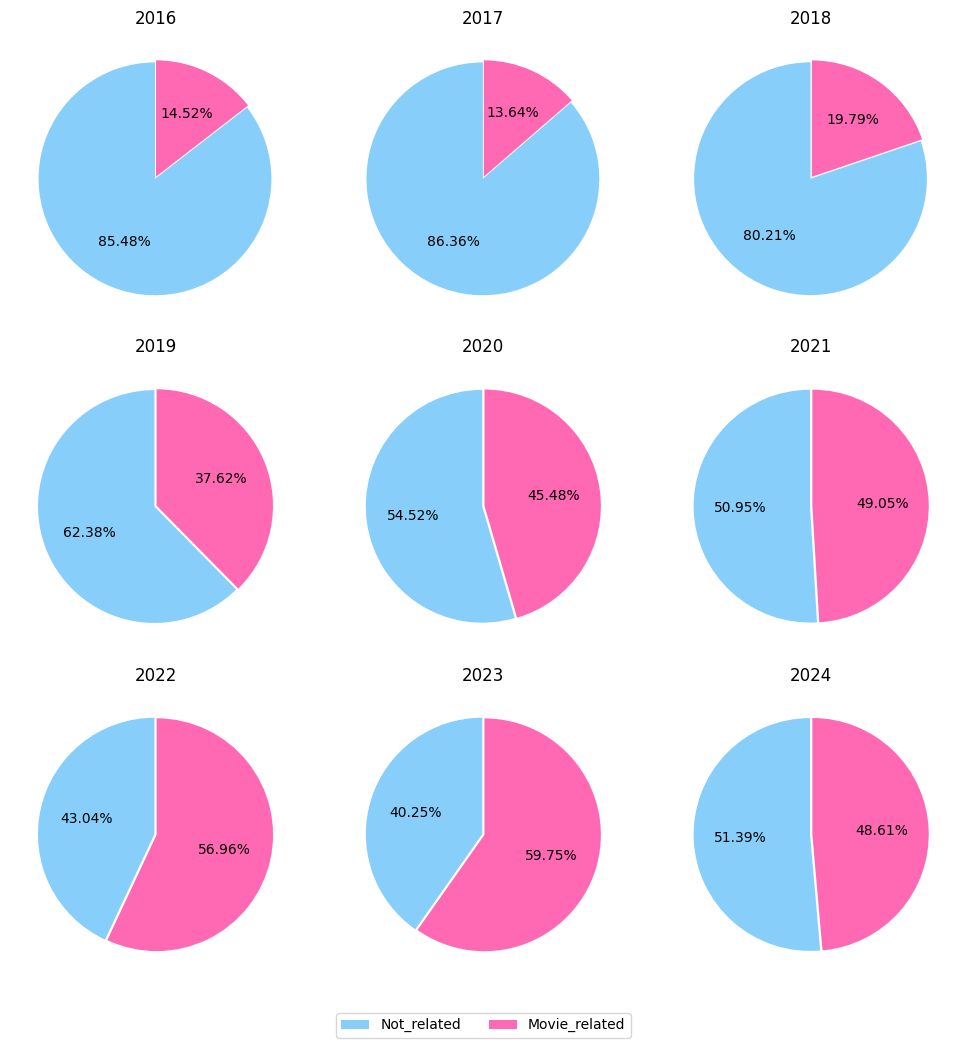

In [56]:
# Define the years and their respective pie_part dataframes
years = range(2016, 2025)
dataframes = {
    2016: combined_2016['is_movie'].value_counts(),
    2017: combined_2017['is_movie'].value_counts(),
    2018: combined_2018['is_movie'].value_counts(),
    2019: combined_2019['is_movie'].value_counts(),
    2020: combined_2020['is_movie'].value_counts(),
    2021: combined_2021['is_movie'].value_counts(),
    2022: combined_2022['is_movie'].value_counts(),
    2023: combined_2023['is_movie'].value_counts(),
    2024: combined_2024['is_movie'].value_counts()
}

# Create a figure with subplots
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

# Define colors and explode parameters
colors = ['lightskyblue', 'hotpink']
explode = (0.01, 0.01)  # Small explode for visual separation

# Create a legend for the pie charts
labels = ['Not_related', 'Movie_related']

for idx, year in enumerate(years):
    pie_part = dataframes.get(year, pd.Series([0, 0]))  # Default to a Series with zeros if not found

    sizes = [pie_part.get(0, 0), pie_part.get(1, 0)]  # Handle cases where counts may be missing

    # Plot the pie chart
    wedges, texts, autotexts = axes[idx].pie(sizes,
                                             colors=colors,
                                             autopct="%1.2f%%",
                                             explode=explode,
                                             startangle=90,
                                             textprops={'fontsize': 10})

    # Set title for each subplot
    axes[idx].set_title(f'{year}')

# Add a single legend for all pie charts
fig.legend(wedges, labels, loc='lower center', ncol=2, fontsize=10, bbox_to_anchor=(0.5, -0.05))

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## 컨텐츠 비교 (통계 검정)

In [59]:
# 결과 확인
dfs = [
    combined_2016,
    combined_2017,
    combined_2018,
    combined_2019,
    combined_2020,
    combined_2021,
    combined_2022,
    combined_2023,
    combined_2024
]

# Combine dataframes into one
df_combined = pd.concat(dfs, ignore_index=True)

df_combined

,account,post_num,post_date,text,num_likes,real_tags,year,month,year_month,num_tags,is_movie,movie_name
0,cgv_korea,3193,2016-03-07,"['cgv_korea', '안녕?난 새로운 CGV 인스타지기 ○○○(이)야!', '...",499,"[#CGV, #CULTUREPLEX, #영화, #카카오프렌즈, #포토티켓, #다이어리]",2016,3,2016-03,6,0,
1,cgv_korea,3192,2016-03-14,"['cgv_korea', '안녕..? 만나서 반가워(부끄부끄)', '난, 새롭게 C...",1382,"[#CGV, #파코니, #만나서반가워, #카카오프렌즈, #무비패스카드, #팔로잉, ...",2016,3,2016-03,7,0,
2,cgv_korea,3191,2016-03-17,"['cgv_korea', '파코니는 팝콘을 아주아주 조아해♥', '친구들은 어떤 메...",565,"[#미션플레이, #CGV먹방, #CGV, #CGV_MissionPlay, #CGV먹...",2016,3,2016-03,13,0,
3,cgv_korea,3190,2016-03-22,"['cgv_korea', '오늘 하루 어떻게 보냈니?', '파코니는 오늘 CGV □...",1735,"[#CGV럭키타임, #CGV, #CGV_LuckyTime, #CGV럭키타임, #여긴...",2016,3,2016-03,11,0,
4,cgv_korea,3189,2016-03-29,"['cgv_korea', '파코니 캘리그라피 배워쪙~ CGV에서 배워쪙-3-', '...",505,"[#CGV, #CulturePlayNews, #파코니, #캘리그라피, #캘리, #손...",2016,3,2016-03,11,0,
...,...,...,...,...,...,...,...,...,...,...,...,...
6126,megaboxon,2,2024-07-22,megaboxon\n카카오뱅크 저금통 with 메가박스💰\n⠀⠀⠀⠀⠀⠀⠀⠀\n지금 ...,194,"[#카카오뱅크, #메가박스, #MEETPLAYSHARE]",2024,7,2024-07,3,0,
6127,megaboxon,3,2024-07-22,"megaboxon\n슈트-업 한 악당 처리반 어떻게 참는데···🍌\n피규어, 빔 키...",463,"[#슈퍼배드4, #슈퍼배드4, #메가박스, #MEETPLAYSHARE]",2024,7,2024-07,4,1,슈퍼배드4
6128,lottecinema_official,4,2024-07-22,lottecinema_official\n동성로 리클라이너🌟 누가 가장 편했나요?\n...,200,"[#동성로리클라이너, #롯데시네마리클라이너, #롯데시네마동성로, #이벤트, #동성로...",2024,7,2024-07,8,0,
6129,megaboxon,1,2024-07-23,megaboxon\n💛SUIT-UP💙\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n📍 한 예매...,950,"[#영화를_가장_잘_간직하는_방법, #슈퍼배드4, #오리지널티켓, #메가박스, #M...",2024,7,2024-07,5,1,슈퍼배드4


In [60]:
# is_movie 값에 따른 'num_likes' 데이터를 추출
likes_movie = df_combined[df_combined['is_movie'] == 1]['num_likes']
likes_no_movie = df_combined[df_combined['is_movie'] == 0]['num_likes']

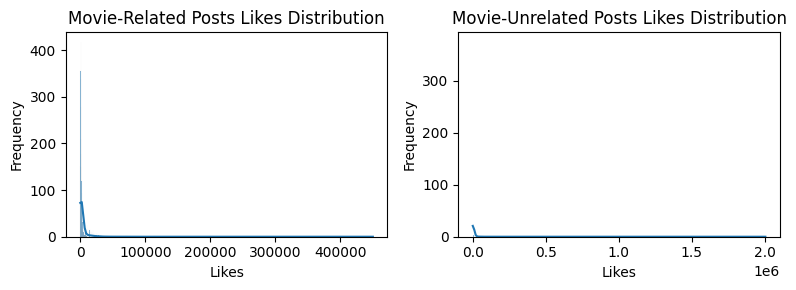

In [61]:
# Distribution plot 시각화
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

sns.histplot(likes_movie, kde=True, ax=axes[0])
axes[0].set_title('Movie-Related Posts Likes Distribution')
axes[0].set_xlabel('Likes')
axes[0].set_ylabel('Frequency')

sns.histplot(likes_no_movie, kde=True, ax=axes[1])
axes[1].set_title('Movie-Unrelated Posts Likes Distribution')
axes[1].set_xlabel('Likes')
axes[1].set_ylabel('Frequency')

# 레이아웃 조정
plt.tight_layout()

# 그래프 출력
plt.show()

In [33]:
import numpy as np
from scipy.stats import skew, kurtosis

In [63]:
# 왜도
print("Skew:")
print(skew(likes_movie))
print(skew(likes_no_movie))

# 첨도
print("Kurtosis:")
print(kurtosis(likes_movie, fisher=True))
print(kurtosis(likes_no_movie, fisher=True))

Skew:
18.019886041774264
32.77888738914777
Kurtosis:
437.0589049146915
1333.84552325405


In [64]:
# 이상치 확인
print(likes_movie.shape)

# IQR 계산
Q1 = np.percentile(likes_movie, 25)
Q3 = np.percentile(likes_movie, 75)
IQR = Q3 - Q1

# 이상치 정의
outlier_mask = (likes_movie < (Q1 - 1.5 * IQR)) | (likes_movie > (Q3 + 1.5 * IQR))

# 이상치 제거
likes_movie_cleaned = likes_movie[~outlier_mask]
print(likes_movie_cleaned.shape)

###################################################################
# 이상치 확인
print(likes_no_movie.shape)

# IQR 계산
Q1 = np.percentile(likes_no_movie, 25)
Q3 = np.percentile(likes_no_movie, 75)
IQR = Q3 - Q1

# 이상치 정의
outlier_mask = (likes_no_movie < (Q1 - 1.5 * IQR)) | (likes_no_movie > (Q3 + 1.5 * IQR))

# 이상치 제거
likes_no_movie_cleaned = likes_no_movie[~outlier_mask]
print(likes_no_movie_cleaned.shape)

(3042,)
(2672,)
(3089,)
(2737,)


In [32]:
from scipy import stats

In [65]:
# boxcox 변환
likes_movie_t = pd.Series(stats.boxcox(likes_movie_cleaned)[0])
likes_no_movie_t = pd.Series(stats.boxcox(likes_no_movie_cleaned)[0])

# 왜도
print("Skew:")
print(skew(likes_movie_t))
print(skew(likes_no_movie_t))

# 첨도
print("Kurtosis:")
print(kurtosis(likes_movie_t, fisher=True))
print(kurtosis(likes_no_movie_t, fisher=True))

Skew:
0.004154020192084697
-0.02094946486346256
Kurtosis:
-0.12479958625953502
-0.4226237307751952


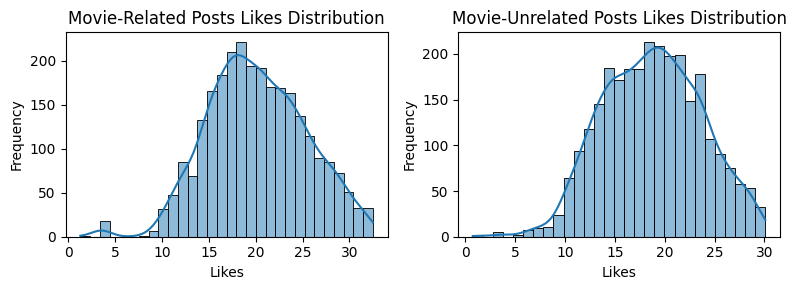

In [37]:
# Distribution plot 시각화
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

sns.histplot(likes_movie_t, kde=True, ax=axes[0])
axes[0].set_title('Movie-Related Posts Likes Distribution')
axes[0].set_xlabel('Likes')
axes[0].set_ylabel('Frequency')

sns.histplot(likes_no_movie_t, kde=True, ax=axes[1])
axes[1].set_title('Movie-Unrelated Posts Likes Distribution')
axes[1].set_xlabel('Likes')
axes[1].set_ylabel('Frequency')

# 레이아웃 조정
plt.tight_layout()

# 그래프 출력
plt.show()

### Kolmogorov-Smirnov 검정:
데이터가 많을 경우에 주로 사용됩니다 (데이터 수천 개 이상).
귀무 가설 (H₀)은 표본의 모집단이 정규분포를 따른다는 것입니다.
대립 가설 (H₁)은 표본의 모집단이 정규분포를 따르지 않는다는 것입니다.

In [38]:
# 정규 분포를 따르는지 검정
statistic, p_value = stats.kstest(likes_movie_cleaned, 'norm')

print(f"K-S Statistic: {statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("H0 기각: 데이터가 정규 분포를 따르지 않는다고 볼 수 있다.")
else:
    print("H0 채택: 데이터가 정규 분포를 따른다고 볼 수 있다.")

statistic, p_value = stats.kstest(likes_movie_t, 'norm')

print(f"K-S Statistic: {statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("H0 기각: 데이터가 정규 분포를 따르지 않는다고 볼 수 있다.")
else:
    print("H0 채택: 데이터가 정규 분포를 따른다고 볼 수 있다.")

K-S Statistic: 0.9996258885147774
P-value: 0.0
H0 기각: 데이터가 정규 분포를 따르지 않는다고 볼 수 있다.
K-S Statistic: 0.9994293148018486
P-value: 0.0
H0 기각: 데이터가 정규 분포를 따르지 않는다고 볼 수 있다.


In [39]:
pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 4.0 MB/s eta 0:00:00


In [40]:
import pingouin as pg

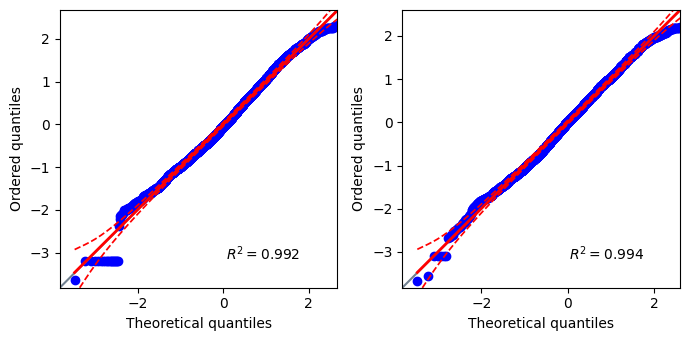

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(7, 7))

pg.qqplot(likes_movie_t, ax=axes[0])
pg.qqplot(likes_no_movie_t, ax=axes[1])

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

In [42]:
# 등분산성 검정
stats.levene(likes_movie_cleaned, likes_no_movie_cleaned) #등분산성 만족

LeveneResult(statistic=102.0543004882267, pvalue=8.750496606869156e-24)

In [43]:
from scipy.stats import mannwhitneyu

In [67]:
# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(likes_movie_t, likes_no_movie_t)

print(f"U statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - there is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis - there is no significant difference between the two groups.")


median_likes_movie = np.median(likes_movie_t)
median_likes_no_movie = np.median(likes_no_movie_t)
# Determine which group has the higher median
if median_likes_movie > median_likes_no_movie:
    print("Movie-related posts have a higher median number of likes.")
else:
    print("Non-movie-related posts have a higher median number of likes.")

U statistic: 5118369.0
P-value: 5.920859981306508e-143
Reject the null hypothesis - there is a significant difference between the two groups.
Movie-related posts have a higher median number of likes.


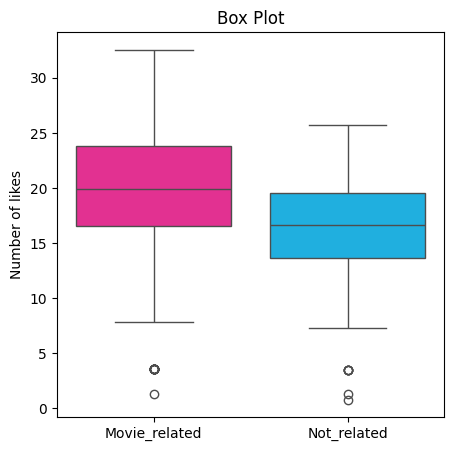

In [66]:
box_data = pd.DataFrame({'Movie_related': likes_movie_t, 'Not_related': likes_no_movie_t})

# 데이터의 박스 플롯 그리기
plt.figure(figsize=(5, 5))
palette = {'Movie_related': 'deeppink', 'Not_related': 'deepskyblue'}
sns.boxplot(data=box_data, palette = palette)
plt.title('Box Plot')
plt.ylabel('Number of likes')
plt.show()